# Import

In [1]:
# Basic
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter('ignore')

# ML Toolkit
from robusta.selector import *
from robusta.crossval import *
from robusta.pipeline import *
from robusta.preprocessing import *
from robusta.testing import get_estimator

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import *

# Plot
from jupyterthemes import jtplot
import matplotlib

jtplot.style('gruvboxd')
matplotlib.use('nbagg')

Using TensorFlow backend.


# Data

In [2]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=500, n_features=20, n_informative=3, 
                       random_state=666, noise=0.1)

X = pd.DataFrame(X)
y = pd.Series(y)

X.rename(columns=lambda x: 'x{}'.format(x), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
y

0      167.188908
1      -75.355216
2      -11.487536
3      323.317743
4       76.102299
          ...    
495   -176.265046
496    -34.560822
497    -34.731648
498   -221.857023
499    -21.887014
Length: 500, dtype: float64

# Task & Model

In [4]:
model = get_estimator('SVM', 'regressor')

scoring = 'r2'
cv = 5

# Baseline

In [5]:
features = X_train.columns

_, y_pred = crossval_predict(model, cv, X_train[features], y_train, X_new=X_test[features],
                             scoring=scoring, verbose=2, n_jobs=None)

[02:50:37]  SVR

[02:50:37]  VAL 1:   0.0355
[02:50:37]  VAL 2:   0.0242
[02:50:37]  VAL 3:   0.0005
[02:50:37]  VAL 4:   0.0506
[02:50:37]  VAL 5:   0.0015

[02:50:37]  VALID:   0.0225 ± 0.0194



# Selector

In [6]:
from robusta.selector import SAS

selector = SAS(model, cv, scoring, n_jobs=-1, temp=.1, max_iter=100, 
               random_state=1, min_step=1, max_step=5)
selector.fit(X_train, y_train)

[02:50:37] ITER: 1/100      SUBSET: 7/20      SCORE: 0.0746 ± 0.0177      ETA: 11 sec
[02:50:37] ITER: 2/100      SUBSET: 8/20      SCORE: 0.0938 ± 0.0229      ETA: 10 sec
[02:50:37] ITER: 3/100      SUBSET: 8/20      SCORE: 0.0947 ± 0.0271      ETA: 10 sec
[02:50:38] ITER: 4/100      SUBSET: 8/20      SCORE: 0.0670 ± 0.0224      ETA: 10 sec
[02:50:38] ITER: 5/100      SUBSET: 7/20      SCORE: 0.0239 ± 0.0181      ETA: 10 sec
[02:50:38] ITER: 6/100      SUBSET: 10/20      SCORE: 0.0496 ± 0.0193      ETA: 10 sec
[02:50:38] ITER: 7/100      SUBSET: 9/20      SCORE: 0.0569 ± 0.0196      ETA: 10 sec
[02:50:38] ITER: 8/100      SUBSET: 8/20      SCORE: 0.0639 ± 0.0212      ETA: 9 sec
[02:50:38] ITER: 9/100      SUBSET: 7/20      SCORE: 0.1065 ± 0.0267      ETA: 9 sec
[02:50:38] ITER: 10/100      SUBSET: 8/20      SCORE: 0.0982 ± 0.0229      ETA: 9 sec
[02:50:38] ITER: 11/100      SUBSET: 9/20      SCORE: 0.0522 ± 0.0180      ETA: 9 sec
[02:50:39] ITER: 12/100      SUBSET: 7/20      SCORE: -

[02:50:49] ITER: 95/100      SUBSET: 6/20      SCORE: 0.0149 ± 0.0188      ETA: 536 ms
[02:50:49] ITER: 96/100      SUBSET: 4/20      SCORE: 0.1128 ± 0.0235      ETA: 429 ms
[02:50:49] ITER: 97/100      SUBSET: 8/20      SCORE: 0.0665 ± 0.0237      ETA: 322 ms
[02:50:49] ITER: 98/100      SUBSET: 10/20      SCORE: 0.0728 ± 0.0223      ETA: 214 ms
[02:50:49] ITER: 99/100      SUBSET: 6/20      SCORE: 0.1364 ± 0.0316      ETA: 107 ms
[02:50:49] ITER: 100/100      SUBSET: 4/20      SCORE: 0.2175 ± 0.0371      ETA: 0 ms
Iterations limit exceed!


SAS(cv=5,
    estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                  gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                  tol=0.001, verbose=False),
    max_features=0.9, max_iter=100, max_step=5, min_features=0.1, min_step=1,
    n_digits=4, n_jobs=-1, random_state=1, scoring='r2', temp=0.1, verbose=1)

<IPython.core.display.Javascript object>


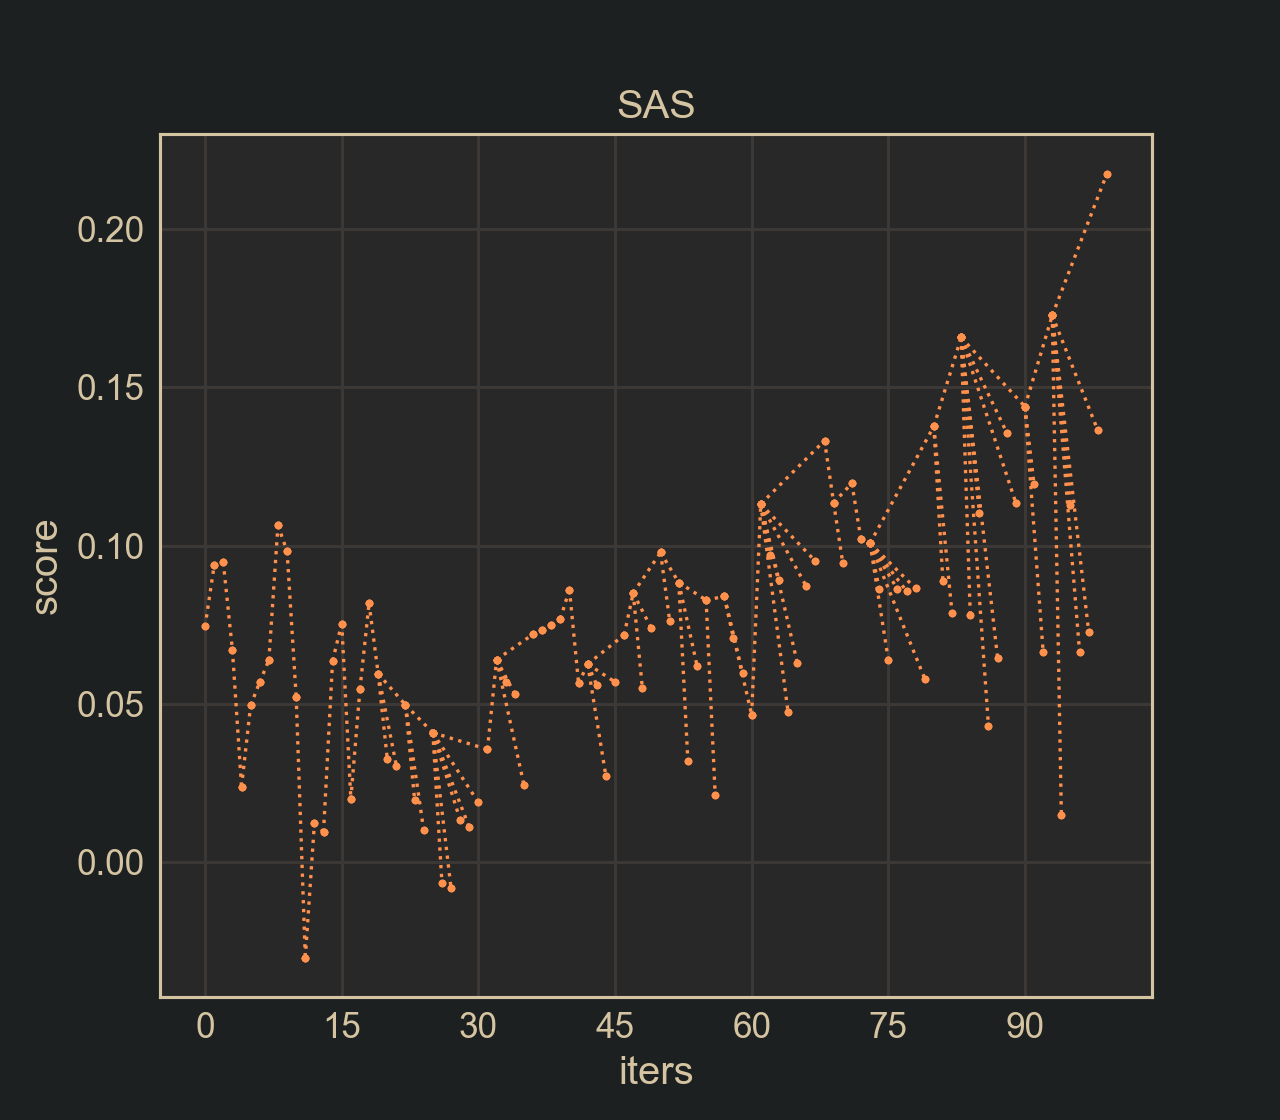

(<Figure size 640x560 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13ce7f908>)

In [7]:
%matplotlib notebook

selector.plot_progress(marker='.', linestyle=':', color='y')

<IPython.core.display.Javascript object>


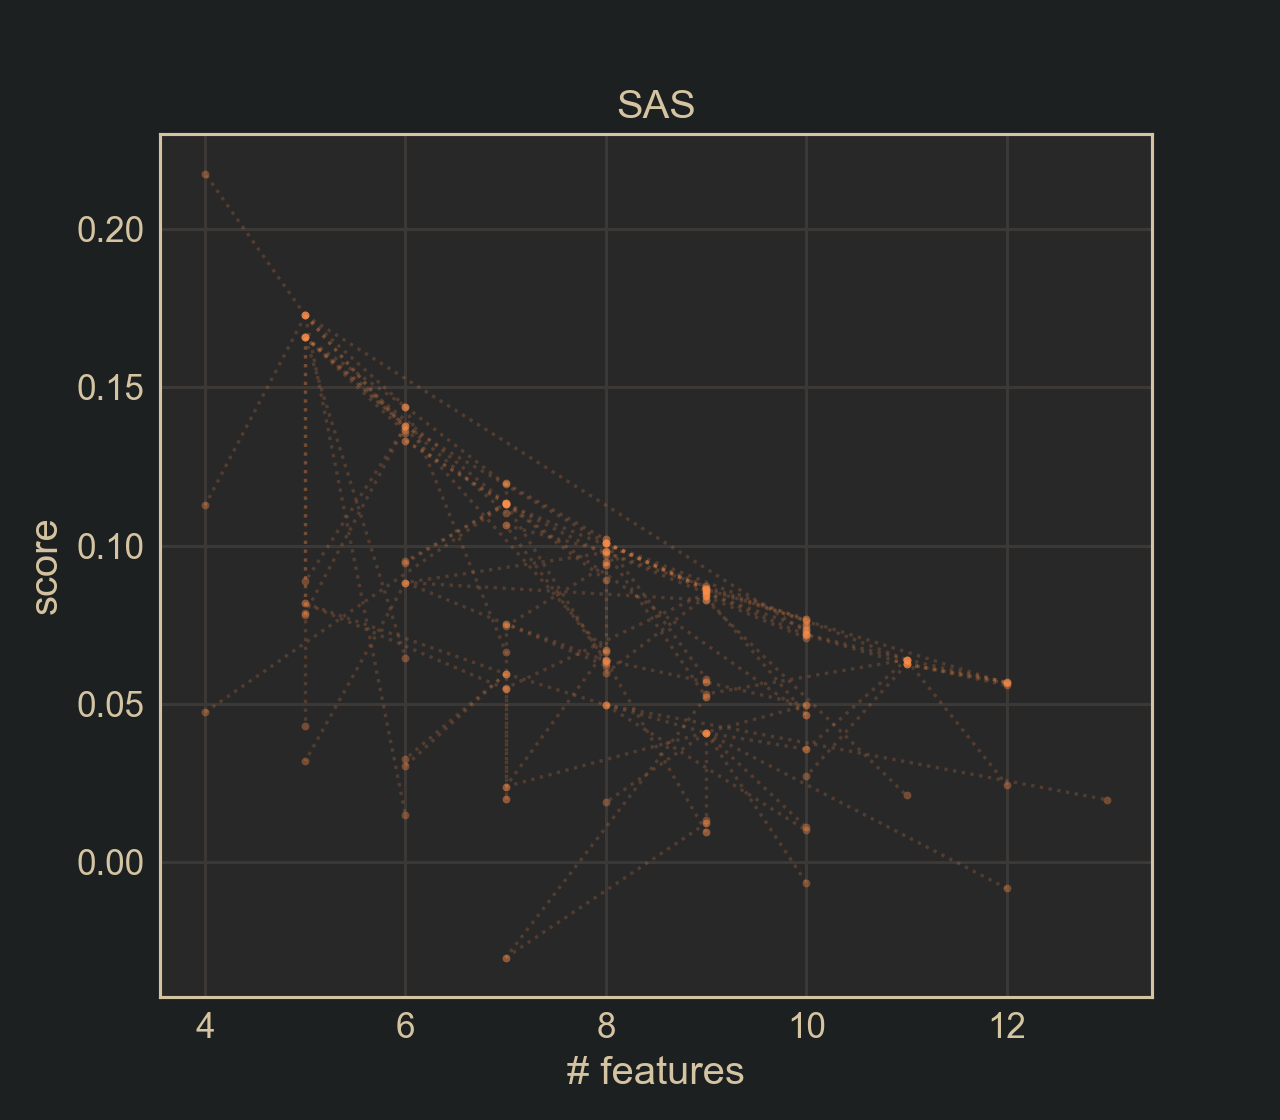

(<Figure size 640x560 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x141e41160>)

In [14]:
%matplotlib notebook

selector.plot_subset(marker='.', linestyle=':', color='y', alpha=0.2)

In [15]:
subset = selector.get_subset()

_, y_pred = crossval_predict(model, cv, X_train[subset], y_train, X_new=X_test[subset],
                             scoring=scoring, method='predict_proba',
                             verbose=2, n_jobs=None)

[02:51:31]  SVR

[02:51:31]  VAL 1:   0.2409
[02:51:31]  VAL 2:   0.1807
[02:51:31]  VAL 3:   0.1715
[02:51:31]  VAL 4:   0.2706
[02:51:31]  VAL 5:   0.2239

[02:51:31]  VALID:   0.2175 ± 0.0371

